In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from collections import Counter
import pandas as pd
import os
import requests
import math

drive.mount('/content/drive')

base_dir = "./CTCI/Caracterización CTCI en Salud/Gráficos"

Mounted at /content/drive


In [ ]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#9FB7B9",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax,
                  pad=-0.004,
                  rounding_size=0.1,
                  mutation_scale=1,
                  mutation_aspect=4):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()

  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        patch.remove()
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle=f"round,pad={pad},rounding_size={rounding_size}",
                          ec="none", fc=color,
                          mutation_aspect=mutation_aspect,
                          mutation_scale=mutation_scale
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)

## MEDICINE


In [ ]:
### OPENALEX DATA EXTRACTION

# PARAMETERS
concept_wikidata = 'https://www.wikidata.org/wiki/Q11190' #MEDICINE
name='medicina'

entity = 'works'
country = 'cl'
date = '2013-01-01'
type_to_search = 'article'

texts_checkpoint = ''
load_texts_checkpoint = True
##############

api_url = 'https://api.openalex.org/{}?filter=concepts.wikidata:{},institutions.country_code:{},from_publication_date:{},type:{}&cursor={}'

### API_URL COMPLETO PARA VOSVIEWER
#https://api.openalex.org/works?filter=concepts.wikidata:https://www.wikidata.org/wiki/Q11190,institutions.country_code:cl,from_publication_date:2016-01-01,to_publication_date:2020-01-01,type:article

page = '*'
has_more_pages = True
fewer_than_10k_results = True

w_count=0
p_count=1
titles_list=[]
keywords_list=[]
keyword_years=[]
public_year=[]
chilean_institutions = []
year_institutions = []
gob_names = []
fac_names = []
concepts_list = []
concepts_list_by_work = []
# loop through pages
while has_more_pages and fewer_than_10k_results:

    # set page value and request page from OpenAlex
    url = api_url.format(entity, concept_wikidata, country, date, type_to_search, page)
    #print('\n' + url)
    page_with_results = requests.get(url).json()
    #print(page_with_results)

    # loop through partial list of results
    results = page_with_results['results']

    ### TO PRINT ###
    kws_sublist = []
    kws_year_sublist = []
    for i, work in enumerate(results):
      titles_list.append(work['display_name'])
      public_year.append(work['publication_year'])
      concepts_work_list = []
      #print(work['display_name'])
      #print(work['keywords'])
      for kw in work['keywords']:
        kws_sublist.append(kw['keyword'])
        kws_year_sublist.append(work['publication_year'])
        #print(kw['keyword'], end='\t' if (i+1)%5!=0 else '\n')
      for c in work['concepts']:
        concepts_work_list.append(c['wikidata'].split('/')[-1])
      for author in work['authorships']:
        for institution in author['institutions']:
          if institution['country_code'] == 'CL':
            chilean_institutions.append(institution['type'])
            year_institutions.append(work['publication_year'])
            if institution['type'] == 'government' and work['publication_year']==2023:
              gob_names.append(institution['display_name'])
            if institution['type'] == 'facility' and work['publication_year']==2023:
              fac_names.append(institution['display_name'])
      concepts_list_by_work.append(concepts_work_list)
      w_count += 1
    ################
    keywords_list = keywords_list + kws_sublist
    keyword_years = keyword_years + kws_year_sublist

    # next page
    page = page_with_results['meta']['next_cursor']
    p_count += 1
    # end loop when either there are no more results on the requested page
    # or the next request would exceed 10,000 results
    per_page = page_with_results['meta']['per_page']
    has_more_pages = len(results) == per_page
    fewer_than_10k_results = True #per_page * p_count <= 10000
    if not fewer_than_10k_results:
      print('More than 10k results. Does not show all results')

assert w_count == len(public_year) == len(titles_list)
assert len(keywords_list) == len(keyword_years)
assert len(chilean_institutions) == len(year_institutions)
print('\n\nTotal {} {}s.'.format(w_count, type_to_search))



Total 55542 articles.


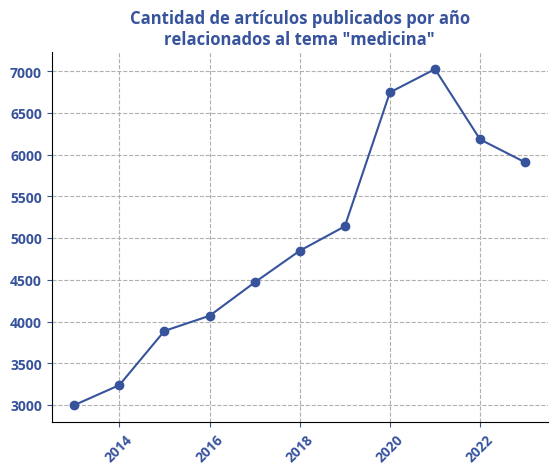

In [ ]:
df_years = pd.DataFrame({'Publication years': public_year, 'Titles': titles_list})
df_years = df_years.drop(df_years[df_years['Publication years'] == 2024].index)
df_years = df_years.sort_values('Publication years')
df_years['Publication years'].value_counts(sort=False).plot(kind='line', rot=45)
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
plt.title('Cantidad de artículos publicados por año\nrelacionados al tema \"{}\"'.format(name))
plt.show()

In [ ]:

medicine_total = df_years['Publication years'].value_counts(sort=False)

### Keywords analysis

In [ ]:
cancer_count = 0
diabetes_count = 0
cardiov_count = 0

for cs in concepts_list_by_work:
  if ('Q12078' in cs) or ('Q133212' in cs) or ('Q1216998' in cs):
    cancer_count += 1
  if 'Q12206' in cs:
    diabetes_count += 1
  if ('Q389735' in cs) or ('Q12152' in cs) or ('Q12202' in cs) or ('Q180762' in cs) or ('Q41861' in cs) or ('Q1079120' in cs) or ('Q266018' in cs) or ('Q844935' in cs):
    cardiov_count += 1
print(cancer_count)
print(diabetes_count)
print(cardiov_count)
print(w_count)

3163
1235
767
55542


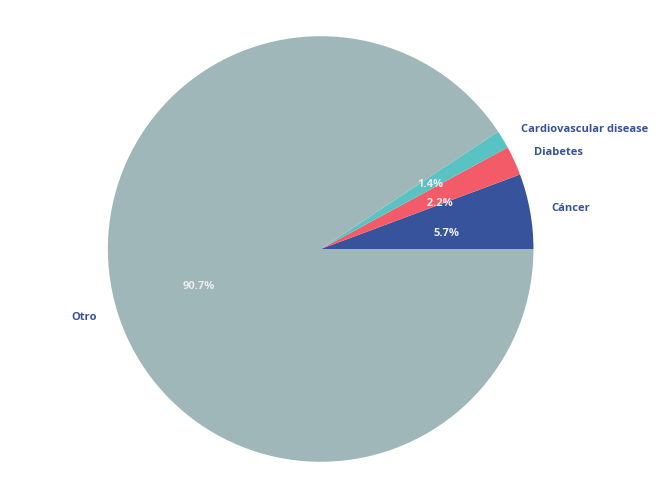

In [ ]:
values_counts = [cancer_count, diabetes_count, cardiov_count, w_count-(cancer_count+diabetes_count+cardiov_count)]
def func(pct, allvals):
    if pct < 3 and pct >2:
      return f"\n  {pct:.1f}%"
    if pct < 6 and pct >5:
      return f"\n{pct:.1f}%"
    return f"{pct:.1f}%"

fig, ax = plt.subplots()
_,_,autotexts=ax.pie(values_counts, labels=['Cáncer', 'Diabetes', 'Cardiovascular disease', 'Otro'],autopct=lambda pct: func(pct, values_counts),
        textprops=dict(fontsize=8), colors=[COLOR_PALETTE[0], COLOR_PALETTE[2], COLOR_PALETTE[1], COLOR_PALETTE[4]])
#plt.title('Porcentaje de publicaciones en Salud que corresponden\na enfermedades seleccionadas', fontsize=10)
for autotext in autotexts:
  autotext.set_color(COLOR_PALETTE[5])
plt.tight_layout(pad=0)
ax.axis('equal')
ax.margins(0.23,0)
plt.savefig(base_dir+'/percent_salud.png')
plt.savefig(base_dir+'/percent_salud.svg')
plt.show()

In [ ]:
counts = Counter(keywords_list)
print('Most common keywords (2013-2024, Chile):\n')
common_kws = counts.most_common(20)
for i, kw_i in enumerate(common_kws):
  if kw_i[0] == name or kw_i[0] == 'chile':
    common_kws.remove(common_kws[i])
common_kws

Most common keywords (2013-2024, Chile):



[('meta-analysis', 648),
 ('latin america', 572),
 ('physical activity', 448),
 ('systematic review', 448),
 ('sars-cov', 444),
 ('adolescents', 414),
 ('cross-sectional', 387),
 ('pandemic', 351),
 ('obesity', 296),
 ('cancer', 295),
 ('long-term', 274),
 ('diabetes mellitus', 262),
 ('diabetes', 258),
 ('breast cancer', 257),
 ('hospital', 256),
 ('mental health', 251),
 ('children', 250),
 ('santiago', 245),
 ('older adults', 234)]

In [ ]:
common_kws.remove(('meta-analysis', 648))
common_kws.remove(('systematic review', 448))
common_kws.remove(('cross-sectional', 387))
common_kws.remove(('diabetes', 258))
common_kws.remove(('diabetes mellitus', 262))

common_kws.insert(1, ('diabetes', 258+262))

common_kws

[('latin america', 572),
 ('diabetes', 520),
 ('physical activity', 448),
 ('sars-cov', 444),
 ('adolescents', 414),
 ('pandemic', 351),
 ('obesity', 296),
 ('cancer', 295),
 ('long-term', 274),
 ('breast cancer', 257),
 ('hospital', 256),
 ('mental health', 251),
 ('children', 250),
 ('santiago', 245),
 ('older adults', 234)]

In [ ]:
df_keywords = pd.DataFrame({'keyword': keywords_list, 'keyword year': keyword_years})
df_keywords

,keyword,keyword year
0,lung cancer,2015
1,docetaxel,2015
2,squamous-cell,2015
3,small-cell,2015
4,pembrolizumab,2016
...,...,...
150781,non-hodgkin,2021
150782,i-bfm,2021
150783,noncentral elliptical distributions,2021
150784,statistical inference,2021


In [ ]:
df_keyword_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for common_kw in common_kws:
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  if common_kw[0] == 'diabetes':
    df_common_kw = df_keywords[(df_keywords['keyword'] == common_kw[0]) | (df_keywords['keyword'] == 'diabetes mellitus')]
  else:
    df_common_kw = df_keywords[df_keywords['keyword'] == common_kw[0]]
  for _, row in df_common_kw.iterrows():
    if row['keyword year'] != 2024:
      counting[map[row['keyword year']]] += 1
  df_keyword_years[common_kw[0]] = counting

df_keyword_years

,latin america,diabetes,physical activity,sars-cov,adolescents,pandemic,obesity,cancer,long-term,breast cancer,hospital,mental health,children,santiago,older adults
2013,24,28,10,0,8,0,8,12,21,8,18,4,10,21,8
2014,17,24,15,0,11,1,14,9,12,12,18,6,11,19,8
2015,40,38,20,0,21,0,27,22,15,16,22,16,12,18,11
2016,39,39,11,0,11,3,18,22,23,13,16,11,22,26,6
2017,34,49,30,0,45,1,29,21,24,16,24,8,20,19,13
2018,35,64,25,0,38,0,27,38,27,27,22,9,14,13,20
2019,48,52,43,0,45,0,33,35,33,25,34,17,23,17,20
2020,81,70,64,112,52,71,38,29,29,39,36,26,34,34,29
2021,93,54,65,140,62,111,31,49,28,24,37,44,30,30,39
2022,84,64,83,127,67,91,40,31,31,39,19,65,46,27,46


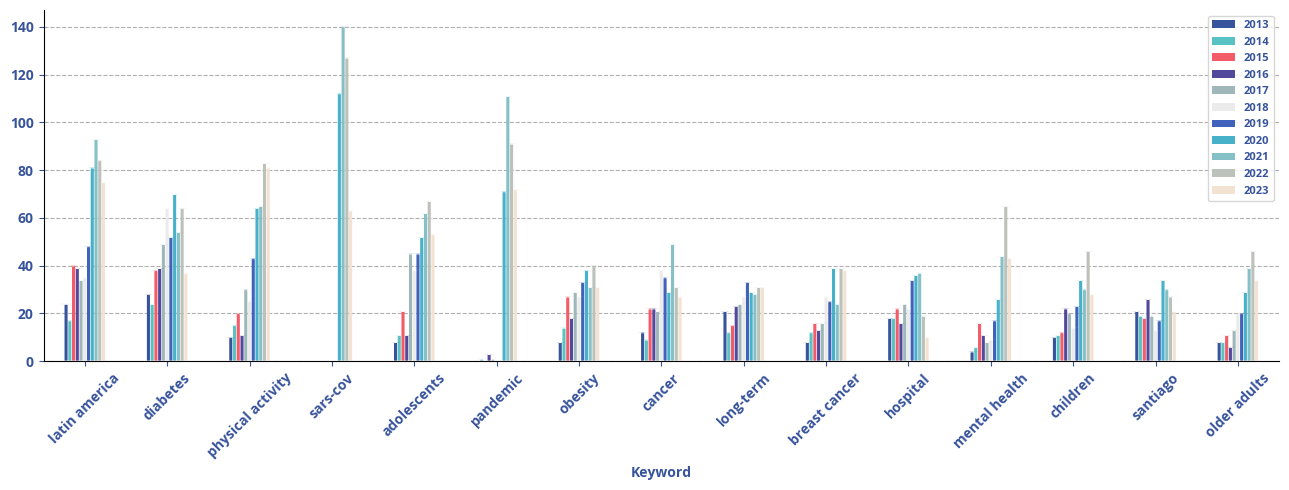

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 11

df_keyword_years.T.plot.bar(rot=45, ax=ax,# color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
                  color=[COLOR_PALETTE[0], COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[3],
          COLOR_PALETTE[4], COLOR_PALETTE[5], COLOR_PALETTE[6], COLOR_PALETTE[7],
          COLOR_PALETTE[8], COLOR_PALETTE[9], COLOR_PALETTE[10]])#, 'plum' ,
          #'powderblue', 'gold', 'yellowgreen')
          #color=["#869CD4", "#778FCE", "#6882C7", "#5976C0", "#4A69B9", "#4360AA", "#3E579A", "#384F8A",
          #"#33467A", "#2D3E6A","#27355A"])
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=8)
ax.set_xlabel('Keyword')#, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
#ax.set_title('Cantidad de artículos por año asignados con las 10 keywords\nmás comunes relacionadas al tema \"{}\"'.format(name))
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/{}_keywords.png'.format(name))
plt.savefig(base_dir + '/{}_keywords.svg'.format(name))
plt.show()

### Institutions analysis

In [ ]:
instituciones_chilenas = []
for i in chilean_institutions:
  if i == 'education':
    instituciones_chilenas.append('Educacional')
  if i == 'healthcare':
    instituciones_chilenas.append('Salud')
  if i == 'facility':
    instituciones_chilenas.append('Centro de\ninvestigación')
  if i == 'company':
    instituciones_chilenas.append('Compañia')
  if i == 'government':
    instituciones_chilenas.append('Gubernamental')
  if i == 'nonprofit':
    instituciones_chilenas.append('Sin fines de\nlucro')
  if i == 'other':
    instituciones_chilenas.append('Otro')

In [ ]:
df_institutions = pd.DataFrame({'type': instituciones_chilenas, 'year': year_institutions})

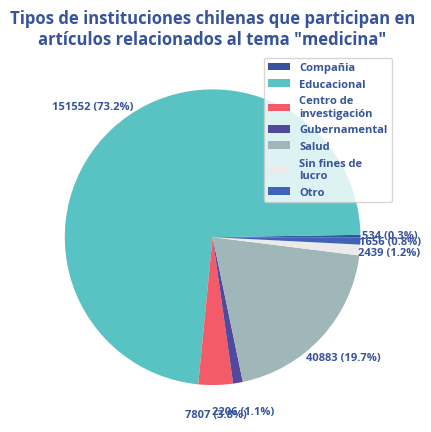

In [ ]:
def label_function(val):
    if int(val / 100 * len(df_institutions))+1 == 50:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions))+1 == 300:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions)) == 72:
      return f'  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions['type'] = pd.Categorical(df_institutions['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
df_institutions.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
plt.legend(loc='upper right', fontsize=8)
plt.title('Tipos de instituciones chilenas que participan en\nartículos relacionados al tema \"{}\"'.format(name))
plt.show()

<ipython-input-18-7357335a6a96>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',


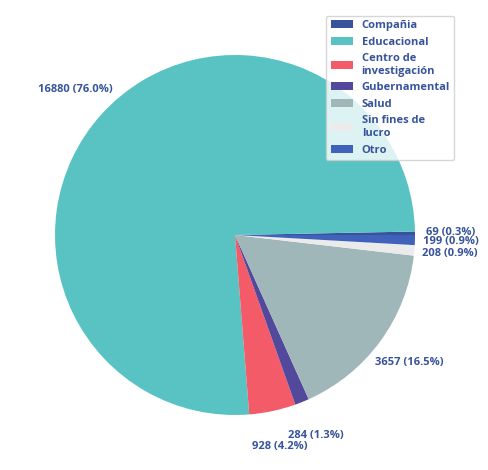

In [ ]:
df_institutions_lastyear = df_institutions[df_institutions['year']==2023]

def label_function(val):
    if np.round(val / 100 * len(df_institutions_lastyear)) == 8:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 33:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 6:
      return f'  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 26:
      return f'               {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
df_institutions_lastyear.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
plt.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participaron en\nartículos relacionados al tema \"{}\"\ndurante año 2023'.format(name))
plt.tight_layout()
plt.savefig(base_dir + '/institutions_{}_2023.png'.format(name))
plt.savefig(base_dir + '/institutions_{}_2023.svg'.format(name))
plt.show()

In [ ]:
df_institutions_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for inst_type in df_institutions['type'].unique():
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_type = df_institutions[df_institutions['type']==inst_type]
  for _, row in df_type.iterrows():
    if row['year'] != 2024:
      counting[map[row['year']]] += 1
  df_institutions_years[inst_type] = counting


df_institutions_years

,Sin fines de\nlucro,Educacional,Salud,Gubernamental,Centro de\ninvestigación,Compañia,Otro
2013,152,7790,2579,105,206,24,72
2014,168,8760,2327,68,366,28,85
2015,165,10662,3427,120,450,43,80
2016,194,10699,3172,94,453,53,122
2017,262,12040,3268,116,662,40,103
2018,270,12855,3350,115,741,28,97
2019,225,13646,4079,172,720,48,124
2020,280,18639,4823,232,978,32,273
2021,233,19182,5323,450,1223,63,250
2022,229,17628,4284,398,932,82,217


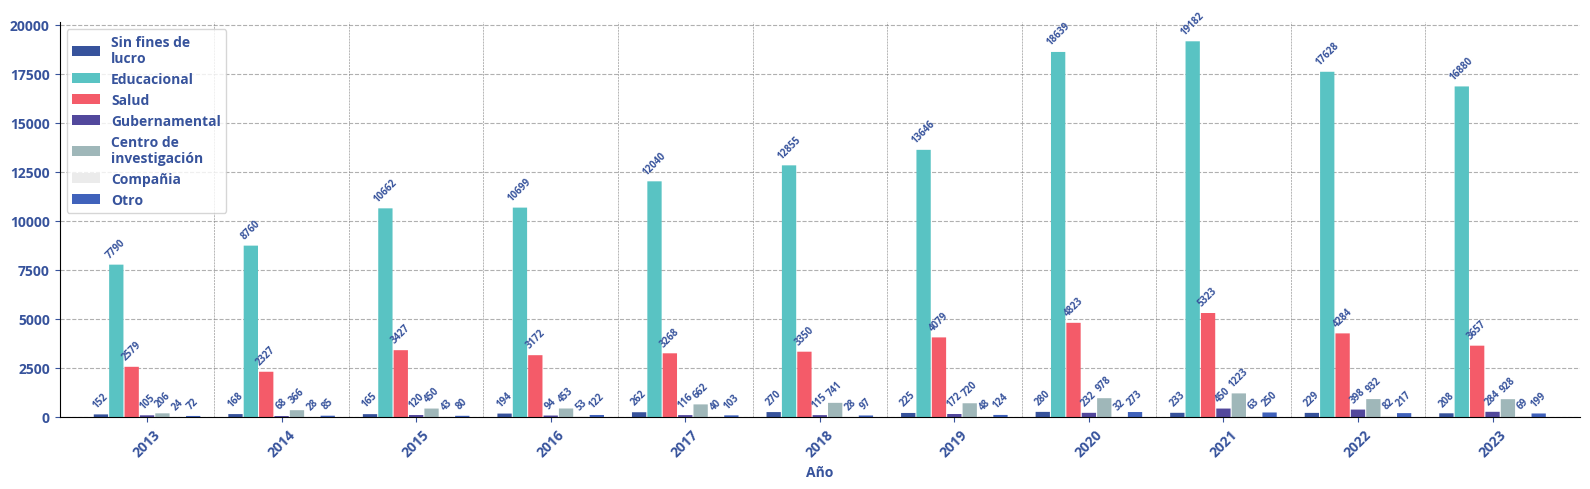

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 7

df_institutions_years.plot.bar(rot=45, ax=ax, width=0.8)#,
                               #color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=10)
ax.set_xlabel('Año')#, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.bar_label(ax.containers[0], rotation=45, fontsize=7, padding=3)#, labels=df_['2018'], fontsize=6, rotation=90, padding=2)
ax.bar_label(ax.containers[1], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[2], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[3], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[4], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[5], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[6], rotation=45, fontsize=7, padding=3)
#, labels=df['2020'], fontsize=6, rotation=90, padding=2)
ax.grid(False, axis='x')
for i in range(11-1):
  ax.axvline(0.5 +i, markersize=0.0001, linewidth=0.4, color='gray', linestyle='--')
round_corners(ax)
#ax.set_title('Evolución en 10 años de los tipos de instituciones chilenas que participan\nen artículos relacionados al tema \"{}\"'.format(name))
plt.tight_layout()
plt.savefig(base_dir+'/evol_instituciones_{}.png'.format(name))
plt.savefig(base_dir+'/evol_instituciones_{}.svg'.format(name))
plt.show()

## CANCER

In [ ]:
### OPENALEX DATA EXTRACTION

# PARAMETERS
concept_wikidata = 'https://www.wikidata.org/wiki/Q12078|https://www.wikidata.org/wiki/Q133212|https://www.wikidata.org/wiki/Q1216998'
# CANCER | TUMOR | NEOPLASM

name='cáncer'

entity = 'works'
country = 'cl'
date = '2013-01-01'
type_to_search = 'article'

texts_checkpoint = ''
load_texts_checkpoint = True
##############

api_url = 'https://api.openalex.org/{}?filter=concepts.wikidata:{},institutions.country_code:{},from_publication_date:{},type:{}&page={}'

### API_URL COMPLETO PARA VOSVIEWER
#https://api.openalex.org/works?filter=concepts.wikidata:https://www.wikidata.org/wiki/Q12078|https://www.wikidata.org/wiki/Q133212|https://www.wikidata.org/wiki/Q1216998,institutions.country_code:cl,from_publication_date:2013-01-01,type:article

page = 1
has_more_pages = True
fewer_than_10k_results = True


w_count=0
titles_list=[]
keywords_list=[]
keyword_years=[]
public_year=[]
chilean_institutions = []
year_institutions = []
gob_names = []
fac_names = []
fac_years = []
# loop through pages
while has_more_pages and fewer_than_10k_results:

    # set page value and request page from OpenAlex
    url = api_url.format(entity, concept_wikidata, country, date, type_to_search, page)
    #print('\n' + url)
    page_with_results = requests.get(url).json()
    #print(page_with_results)

    # loop through partial list of results
    results = page_with_results['results']

    ### TO PRINT ###
    kws_sublist = []
    kws_year_sublist = []
    for i, work in enumerate(results):
      titles_list.append(work['display_name'])
      public_year.append(work['publication_year'])
      #print(work['display_name'])
      #print(work['keywords'])
      for kw in work['keywords']:
        kws_sublist.append(kw['keyword'])
        kws_year_sublist.append(work['publication_year'])
        #print(kw['keyword'], end='\t' if (i+1)%5!=0 else '\n')
      for author in work['authorships']:
        for institution in author['institutions']:
          if institution['country_code'] == 'CL':
            chilean_institutions.append(institution['type'])
            year_institutions.append(work['publication_year'])
            if institution['type'] == 'government' and work['publication_year']==2023:
              gob_names.append(institution['display_name'])
            if institution['type'] == 'facility':
              fac_names.append(institution['display_name'])
              fac_years.append(work['publication_year'])

      w_count += 1
    ################
    keywords_list = keywords_list + kws_sublist
    keyword_years = keyword_years + kws_year_sublist

    # next page
    page += 1

    # end loop when either there are no more results on the requested page
    # or the next request would exceed 10,000 results
    per_page = page_with_results['meta']['per_page']
    has_more_pages = len(results) == per_page
    fewer_than_10k_results = per_page * page <= 10000
    if not fewer_than_10k_results:
      print('More than 10k results. Does not show all results')

assert w_count == len(public_year) == len(titles_list)
assert len(keywords_list) == len(keyword_years)
assert len(chilean_institutions) == len(year_institutions)
print('\n\nTotal {} {}s.'.format(w_count, type_to_search))



Total 3602 articles.


In [ ]:
df_facilities = pd.DataFrame({'nombre': fac_names, 'año': fac_years})
for y in range(2013, 2024):
  print('Año {}:'.format(y))
  for center in df_facilities[df_facilities['año']==y]['nombre'].unique():
    print('{} = {} artículos.'.format(center, len(df_facilities[(df_facilities['año']==y)&(df_facilities['nombre']==center)])))
  print()


Año 2013:
Interdisciplinary Center for Aquaculture Research = 1 artículos.
Fraunhofer Chile Research Foundation = 1 artículos.
Millennium Institute on Immunology and Immunotherapy = 6 artículos.
Millennium Nucleus of Ion Channel Associated Diseases = 1 artículos.

Año 2014:
Advanced Center for Chronic Diseases = 25 artículos.
Millennium Institute on Immunology and Immunotherapy = 7 artículos.
Instituto de Neurociencia Biomédica = 1 artículos.

Año 2015:
Millennium Institute on Immunology and Immunotherapy = 7 artículos.
Advanced Center for Chronic Diseases = 38 artículos.
Center of Applied Ecology & Sustainability = 5 artículos.
Instituto de Investigaciones Agropecuarias = 2 artículos.
Instituto de Neurociencia Biomédica = 2 artículos.

Año 2016:
Center for Climate and Resilience Research = 4 artículos.
Advanced Center for Chronic Diseases = 30 artículos.
Millennium Institute on Immunology and Immunotherapy = 7 artículos.
Instituto de Neurociencia Biomédica = 4 artículos.
Millennium In

In [ ]:
cancer_total = df_years['Publication years'].value_counts(sort=False)

In [ ]:
len(fac_names)

867

In [ ]:
len(gob_names)

27

In [ ]:
set(gob_names)

{'Chilean Air Force',
 'Millennium Science Initiative',
 'Ministry of Health',
 'United Nations Economic Commission for Latin America and the Caribbean'}

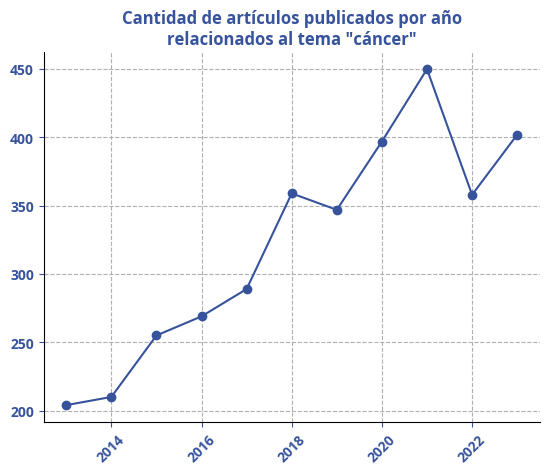

In [ ]:
df_years = pd.DataFrame({'Publication years': public_year, 'Titles': titles_list})
df_years = df_years.drop(df_years[df_years['Publication years'] == 2024].index)
df_years = df_years.sort_values('Publication years')
df_years['Publication years'].value_counts(sort=False).plot(kind='line', rot=45)
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
plt.title('Cantidad de artículos publicados por año\nrelacionados al tema \"{}\"'.format(name))
plt.show()

In [ ]:
cancer_total = df_years['Publication years'].value_counts(sort=False)

### Keywords analysis

In [ ]:
counts = Counter(keywords_list)
print('Most common keywords (2013-2024, Chile):\n')
common_kws = counts.most_common(12)
for i, kw_i in enumerate(common_kws):
  if kw_i[0] == name or kw_i[0] == 'chile':
    common_kws.remove(common_kws[i])
common_kws

Most common keywords (2013-2024, Chile):



[('breast cancer', 310),
 ('cancer', 288),
 ('prostate cancer', 147),
 ('gastric cancer', 141),
 ('chemotherapy', 106),
 ('lung cancer', 101),
 ('pembrolizumab', 91),
 ('colorectal cancer', 88),
 ('cancer cells', 71),
 ('first-line', 69),
 ('ovarian cancer', 64)]

In [ ]:
common_kws.remove(('cancer', 288))
common_kws

[('breast cancer', 310),
 ('prostate cancer', 147),
 ('gastric cancer', 141),
 ('chemotherapy', 106),
 ('lung cancer', 101),
 ('pembrolizumab', 91),
 ('colorectal cancer', 88),
 ('cancer cells', 71),
 ('first-line', 69),
 ('ovarian cancer', 64)]

In [ ]:
df_keywords = pd.DataFrame({'keyword': keywords_list, 'keyword year': keyword_years})
df_keywords

,keyword,keyword year
0,lung cancer,2015
1,docetaxel,2015
2,squamous-cell,2015
3,small-cell,2015
4,pembrolizumab,2016
...,...,...
11210,cancer,2021
11211,risk,2021
11212,exposure,2021
11213,cáncer,2021


In [ ]:
df_keyword_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for common_kw in common_kws:
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_common_kw = df_keywords[df_keywords['keyword'] == common_kw[0]]
  for _, row in df_common_kw.iterrows():
    if row['keyword year'] != 2024:
      counting[map[row['keyword year']]] += 1
  df_keyword_years[common_kw[0]] = counting

df_keyword_years

,breast cancer,prostate cancer,gastric cancer,chemotherapy,lung cancer,pembrolizumab,colorectal cancer,cancer cells,first-line,ovarian cancer
2013,10,17,6,2,2,0,8,2,1,3
2014,16,14,4,2,4,0,2,6,1,3
2015,21,22,9,1,6,1,3,5,1,11
2016,24,12,14,7,4,10,4,4,4,1
2017,17,7,11,4,10,5,5,9,3,8
2018,37,16,15,11,13,8,8,6,4,6
2019,29,9,16,10,14,7,11,7,11,6
2020,46,13,19,13,10,14,9,11,8,9
2021,26,18,16,17,12,16,16,8,13,3
2022,45,12,13,16,12,11,14,6,9,5


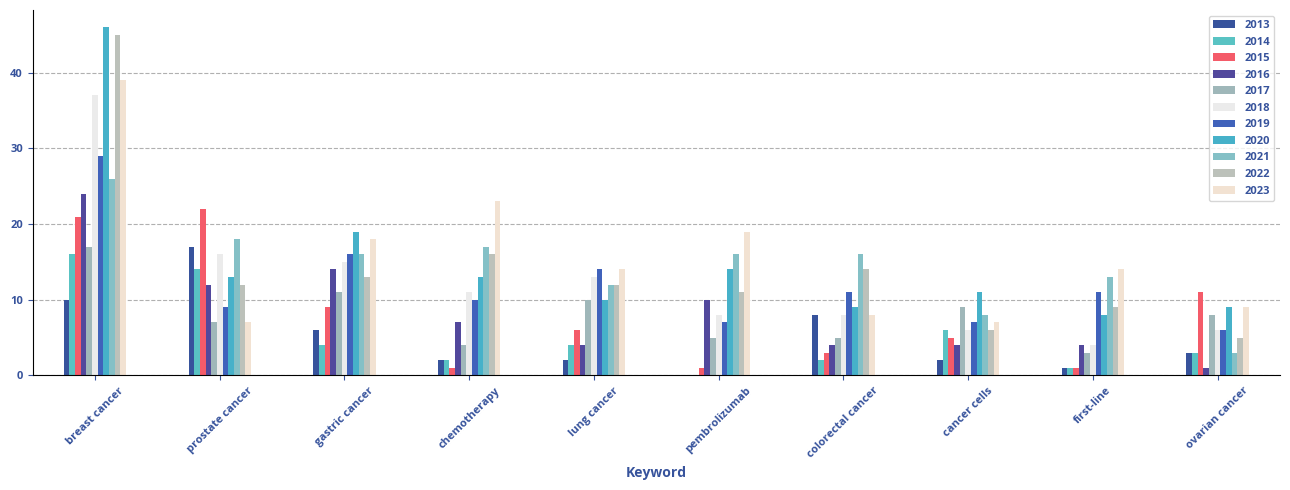

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 11

df_keyword_years.T.plot.bar(rot=45, ax=ax)#, color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=8)
ax.set_xlabel('Keyword')#, fontsize=8)
ax.tick_params(axis='both', labelsize=8)
#ax.set_title('Cantidad de artículos por año asignados con las 10 keywords\nmás comunes relacionadas al tema \"{}\"'.format(name))
#round_corners(ax)
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir + '/{}_keywords.png'.format(name))
plt.savefig(base_dir + '/{}_keywords.svg'.format(name))
plt.show()

### Institutions analysis

In [ ]:
instituciones_chilenas = []
for i in chilean_institutions:
  if i == 'education':
    instituciones_chilenas.append('Educacional')
  if i == 'healthcare':
    instituciones_chilenas.append('Salud')
  if i == 'facility':
    instituciones_chilenas.append('Centro de\ninvestigación')
  if i == 'company':
    instituciones_chilenas.append('Compañia')
  if i == 'government':
    instituciones_chilenas.append('Gubernamental')
  if i == 'nonprofit':
    instituciones_chilenas.append('Sin fines de\nlucro')
  if i == 'other':
    instituciones_chilenas.append('Otro')

In [ ]:
df_institutions = pd.DataFrame({'type': instituciones_chilenas, 'year': year_institutions})

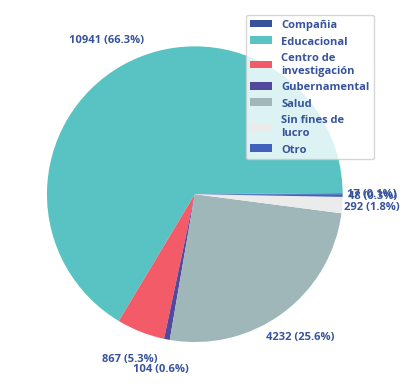

In [ ]:
def label_function(val):
    if int(val / 100 * len(df_institutions))+1 == 50:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions))+1 == 300:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions)) == 72:
      return f'  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions['type'] = pd.Categorical(df_institutions['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
df_institutions.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
plt.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participan en\nartículos relacionados al tema \"{}\"'.format(name))
plt.show()

<ipython-input-37-965d62e15864>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',


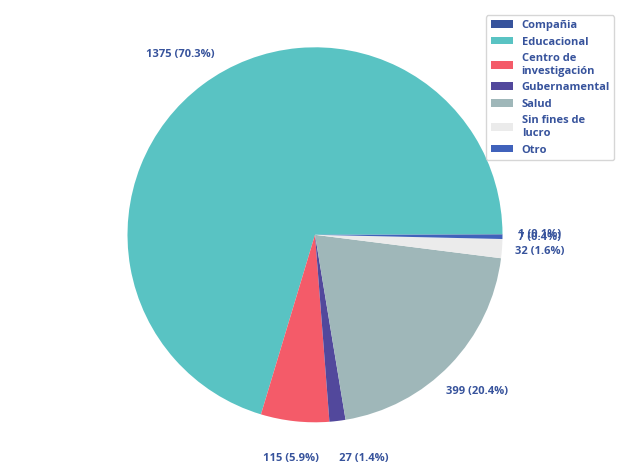

In [ ]:
df_institutions_lastyear = df_institutions[df_institutions['year']==2023]

def label_function(val):
    if np.round(val / 100 * len(df_institutions_lastyear)) == 8:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 33:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 6:
      return f'  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 27:
      return f'               {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
ax = df_institutions_lastyear.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
ax.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participaron en\nartículos relacionados al tema \"{}\"\ndurante año 2023'.format(name))
plt.tight_layout()
ax.axis('equal')
ax.margins(0,0.1)
plt.savefig(base_dir + '/institutions_{}_2023.png'.format(name))
plt.savefig(base_dir + '/institutions_{}_2023.svg'.format(name))
plt.show()

In [ ]:
df_institutions_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for inst_type in df_institutions['type'].unique():
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_type = df_institutions[df_institutions['type']==inst_type]
  for _, row in df_type.iterrows():
    if row['year'] != 2024:
      counting[map[row['year']]] += 1
  df_institutions_years[inst_type] = counting


df_institutions_years

,Sin fines de\nlucro,Educacional,Salud,Gubernamental,Centro de\ninvestigación,Otro,Compañia
2013,17,597,256,16,9,3,2
2014,27,628,287,0,33,3,1
2015,11,792,326,2,54,0,7
2016,49,808,377,0,48,2,1
2017,41,835,334,6,82,1,0
2018,27,1177,460,5,124,4,2
2019,24,983,371,6,107,7,0
2020,32,1311,445,10,116,6,0
2021,15,1227,505,23,94,13,1
2022,11,992,427,9,75,1,2


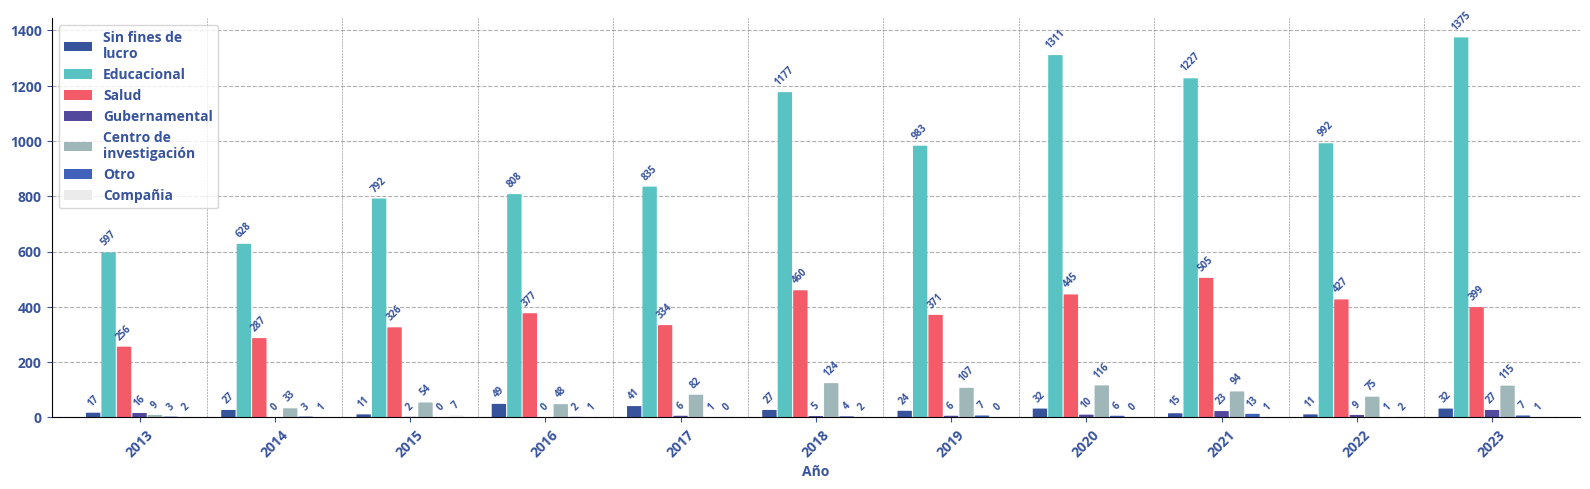

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 7

df_institutions_years.plot.bar(rot=45, ax=ax, width=0.8,
                               color=[COLOR_PALETTE[0], COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[3],
                                      COLOR_PALETTE[4], COLOR_PALETTE[6], COLOR_PALETTE[5]])#,
                               #color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=10)
ax.set_xlabel('Año')#, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.bar_label(ax.containers[0], rotation=45, fontsize=7, padding=3)#, labels=df_['2018'], fontsize=6, rotation=90, padding=2)
ax.bar_label(ax.containers[1], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[2], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[3], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[4], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[5], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[6], rotation=45, fontsize=7, padding=3)
#, labels=df['2020'], fontsize=6, rotation=90, padding=2)
#ax.set_title('Evolución en 10 años de los tipos de instituciones chilenas que participan\nen artículos relacionados al tema \"{}\"'.format(name))
ax.grid(False, axis='x')
round_corners(ax)
for i in range(11-1):
  ax.axvline(0.5 +i, markersize=0.0001, linewidth=0.4, color='gray', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+'/evol_instituciones_{}.png'.format(name))
plt.savefig(base_dir+'/evol_instituciones_{}.svg'.format(name))
plt.show()

## DIABETES

In [ ]:
### OPENALEX DATA EXTRACTION

# PARAMETERS

concept_wikidata = 'https://www.wikidata.org/wiki/Q12206' # DIABETES
entity = 'works'
country = 'cl'
date = '2013-01-01'
type_to_search = 'article'
name='diabetes'

texts_checkpoint = ''
load_texts_checkpoint = True
##############

api_url = 'https://api.openalex.org/{}?filter=concepts.wikidata:{},institutions.country_code:{},from_publication_date:{},type:{}&page={}'

### API_URL COMPLETO PARA VOSVIEWER
#https://api.openalex.org/works?filter=concepts.wikidata:https://www.wikidata.org/wiki/Q12206,institutions.country_code:cl,from_publication_date:2013-01-01,type:article
page = 1
has_more_pages = True
fewer_than_10k_results = True

w_count=0
titles_list=[]
keywords_list=[]
keyword_years=[]
public_year=[]
chilean_institutions = []
year_institutions = []
gob_names = []
fac_names = []
fac_years = []
# loop through pages
while has_more_pages and fewer_than_10k_results:

    # set page value and request page from OpenAlex
    url = api_url.format(entity, concept_wikidata, country, date, type_to_search, page)
    #print('\n' + url)
    page_with_results = requests.get(url).json()
    #print(page_with_results)

    # loop through partial list of results
    results = page_with_results['results']

    ### TO PRINT ###
    kws_sublist = []
    kws_year_sublist = []
    for i, work in enumerate(results):
      titles_list.append(work['display_name'])
      public_year.append(work['publication_year'])
      #print(work['display_name'])
      #print(work['keywords'])
      for kw in work['keywords']:
        kws_sublist.append(kw['keyword'])
        kws_year_sublist.append(work['publication_year'])
        #print(kw['keyword'], end='\t' if (i+1)%5!=0 else '\n')
      for author in work['authorships']:
        for institution in author['institutions']:
          if institution['country_code'] == 'CL':
            chilean_institutions.append(institution['type'])
            year_institutions.append(work['publication_year'])
            if institution['type'] == 'government' and work['publication_year']==2023:
              #print(institution)
              gob_names.append(institution['display_name'])
            if institution['type'] == 'facility':
              fac_names.append(institution['display_name'])
              fac_years.append(work['publication_year'])
      w_count += 1
    ################
    keywords_list = keywords_list + kws_sublist
    keyword_years = keyword_years + kws_year_sublist

    # next page
    page += 1

    # end loop when either there are no more results on the requested page
    # or the next request would exceed 10,000 results
    per_page = page_with_results['meta']['per_page']
    has_more_pages = len(results) == per_page
    fewer_than_10k_results = per_page * page <= 10000
    if not fewer_than_10k_results:
      print('More than 10k results. Does not show all results')

print('\n\nTotal {} {}s.'.format(w_count, type_to_search))



Total 1243 articles.


In [ ]:
df_facilities = pd.DataFrame({'nombre': fac_names, 'año': fac_years})
for y in range(2013, 2024):
  print('Año {}:'.format(y))
  for center in df_facilities[df_facilities['año']==y]['nombre'].unique():
    print('{} = {} artículos.'.format(center, len(df_facilities[(df_facilities['año']==y)&(df_facilities['nombre']==center)])))
  print()

Año 2013:

Año 2014:
Advanced Center for Chronic Diseases = 1 artículos.
Millennium Institute on Immunology and Immunotherapy = 4 artículos.
Agriaquaculture Nutritional Genomic Center = 1 artículos.

Año 2015:
Advanced Center for Chronic Diseases = 12 artículos.
Center of Applied Ecology & Sustainability = 1 artículos.
Dirección de Investigación y Desarrollo = 1 artículos.

Año 2016:
Advanced Center for Chronic Diseases = 20 artículos.

Año 2017:
Advanced Center for Chronic Diseases = 5 artículos.
Millennium Institute on Immunology and Immunotherapy = 2 artículos.

Año 2018:
Advanced Center for Chronic Diseases = 16 artículos.
Millennium Institute on Immunology and Immunotherapy = 6 artículos.

Año 2019:
Advanced Center for Chronic Diseases = 20 artículos.
Millennium Institute on Immunology and Immunotherapy = 1 artículos.
Instituto de Neurociencia Biomédica = 2 artículos.

Año 2020:
Advanced Center for Chronic Diseases = 20 artículos.
Millennium Institute on Immunology and Immunothera

In [ ]:
len(fac_names)

165

In [ ]:
set(gob_names)

{'Millennium Science Initiative'}

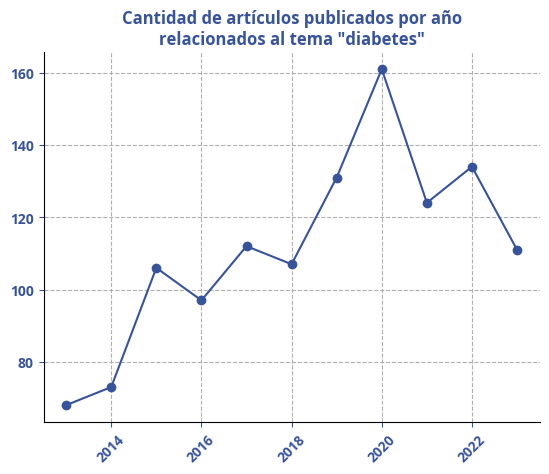

In [ ]:
df_years = pd.DataFrame({'Publication years': public_year, 'Titles': titles_list})
df_years = df_years.drop(df_years[df_years['Publication years'] == 2024].index)
df_years = df_years.sort_values('Publication years')
df_years['Publication years'].value_counts(sort=False).plot(kind='line', rot=45)
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
plt.title('Cantidad de artículos publicados por año\nrelacionados al tema \"{}\"'.format(name))
plt.show()

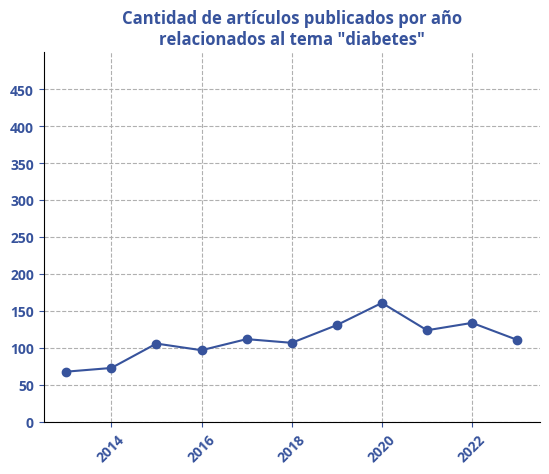

In [ ]:
df_years = pd.DataFrame({'Publication years': public_year, 'Titles': titles_list})
df_years = df_years.drop(df_years[df_years['Publication years'] == 2024].index)
df_years = df_years.sort_values('Publication years')
df_years['Publication years'].value_counts(sort=False).plot(kind='line', rot=45)
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
plt.title('Cantidad de artículos publicados por año\nrelacionados al tema \"{}\"'.format(name))
plt.ylim((0,500))
plt.yticks(list(range(0,500, 50)))
plt.show()

In [ ]:
diabetes_total = df_years['Publication years'].value_counts(sort=False)

### Keywords

In [ ]:
counts = Counter(keywords_list)
print('Most common keywords (2013-2024, Chile):\n')
common_kws = counts.most_common(15)

for i, kw_i in enumerate(common_kws):
  if kw_i[0] == 'chile' or kw_i[0] == 'diabetes mellitus' or kw_i[0] == name:
    common_kws.remove(common_kws[i])

common_kws

Most common keywords (2013-2024, Chile):



[('diabetes mellitus', 202),
 ('gestational diabetes mellitus', 44),
 ('metabolic syndrome', 38),
 ('gestational diabetes', 33),
 ('obesity', 30),
 ('meta-analysis', 29),
 ('insulin resistance', 20),
 ('hypertension', 20),
 ('physical activity', 19),
 ('systematic review', 18),
 ('cardiovascular disease', 17),
 ('diabetic patients', 17),
 ('insulin', 16)]

In [ ]:
common_kws.insert(0, ('gestational diabetes', 44+33))
common_kws.remove(('gestational diabetes mellitus', 44))
common_kws.remove(('gestational diabetes', 33))
common_kws.remove(('meta-analysis', 29))
common_kws.remove(('systematic review', 18))
common_kws

[('gestational diabetes', 77),
 ('gestational diabetes', 76),
 ('diabetes mellitus', 202),
 ('metabolic syndrome', 38),
 ('obesity', 30),
 ('insulin resistance', 20),
 ('hypertension', 20),
 ('physical activity', 19),
 ('cardiovascular disease', 17),
 ('diabetic patients', 17),
 ('insulin', 16)]

In [ ]:
df_keywords = pd.DataFrame({'keyword': keywords_list, 'keyword year': keyword_years})
df_keywords

,keyword,keyword year
0,nonalcoholic fatty liver disease,2019
1,nonalcoholic steatohepatitis,2019
2,fatty liver disease,2019
3,insulin resistance,2018
4,cardiovascular disease,2018
...,...,...
3767,mirnas,2021
3768,diabetes mellitus,2021
3769,vesicle-associated,2021
3770,diabetes mellitus,2021


In [ ]:
df_keyword_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for common_kw in common_kws:
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  if common_kw[0] == 'gestational diabetes':
    df_common_kw = df_keywords[(df_keywords['keyword'] ==common_kw[0]) | (df_keywords['keyword'] == 'gestational diabetes mellitus')]
  else:
    df_common_kw = df_keywords[df_keywords['keyword'] == common_kw[0]]
  for _, row in df_common_kw.iterrows():
    if row['keyword year'] != 2024:
      counting[map[row['keyword year']]] += 1
  df_keyword_years[common_kw[0]] = counting

df_keyword_years

,gestational diabetes,diabetes mellitus,metabolic syndrome,obesity,insulin resistance,hypertension,physical activity,cardiovascular disease,diabetic patients,insulin
2013,1,11,8,1,1,3,0,0,1,0
2014,4,6,0,2,1,0,2,1,2,0
2015,8,18,6,1,0,2,3,1,2,7
2016,1,15,1,0,0,1,1,0,1,1
2017,7,21,3,4,2,3,3,3,0,2
2018,7,24,1,4,1,1,2,2,1,0
2019,14,18,5,0,5,5,3,1,3,2
2020,5,29,4,6,0,3,1,1,1,3
2021,9,25,6,3,4,1,1,4,2,0
2022,12,22,1,4,2,1,1,0,1,1


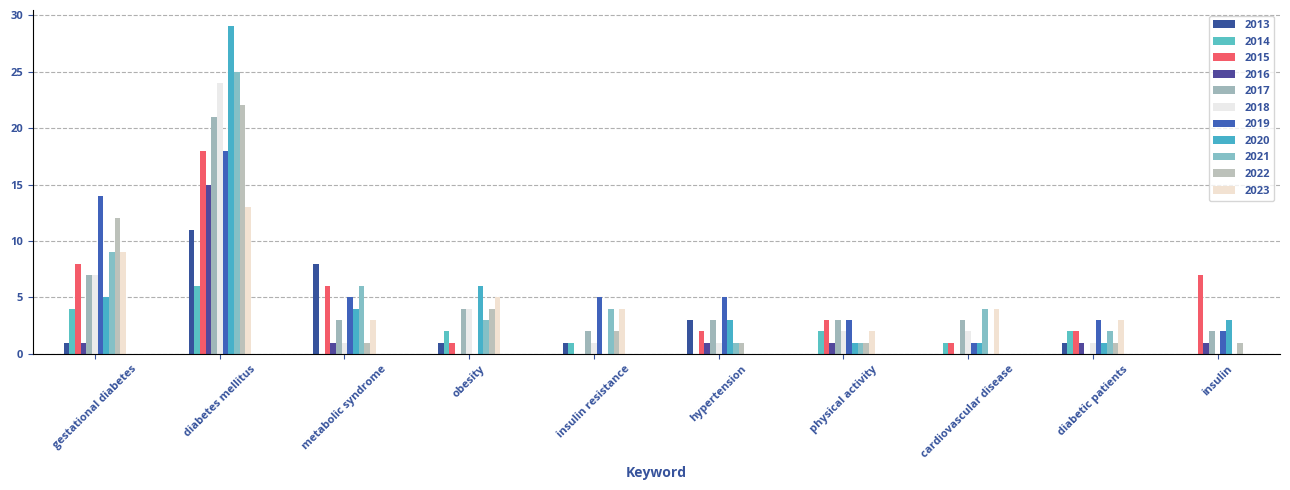

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
cm = plt.get_cmap('tab20')
NUM_COLORS = 11

df_keyword_years.T.plot.bar(rot=45, ax=ax)#, color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=8)
ax.set_xlabel('Keyword')#, fontsize=8)
ax.tick_params(axis='both', labelsize=8)
#ax.set_title('Cantidad de artículos por año asignados con las 10 keywords\nmás comunes relacionadas al tema \"{}\"'.format(name))
ax.grid(False, axis='x')
#round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/{}_keywords.png'.format(name))
plt.savefig(base_dir+'/{}_keywords.svg'.format(name))
plt.show()

### Institutions analysis

In [ ]:
instituciones_chilenas = []
for i in chilean_institutions:
  if i == 'education':
    instituciones_chilenas.append('Educacional')
  if i == 'healthcare':
    instituciones_chilenas.append('Salud')
  if i == 'facility':
    instituciones_chilenas.append('Centro de\ninvestigación')
  if i == 'company':
    instituciones_chilenas.append('Compañia')
  if i == 'government':
    instituciones_chilenas.append('Gubernamental')
  if i == 'nonprofit':
    instituciones_chilenas.append('Sin fines de\nlucro')
  if i == 'other':
    instituciones_chilenas.append('Otro')

In [ ]:
df_institutions = pd.DataFrame({'type': instituciones_chilenas, 'year': year_institutions})

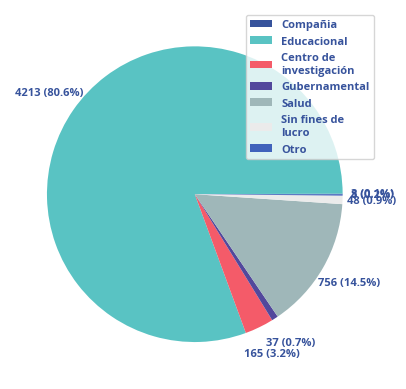

In [ ]:
def label_function(val):
    if int(val / 100 * len(df_institutions)) == 57:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions)) == 348:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions))+1 == 151:
      return f'\n{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)

df_institutions['type'] = pd.Categorical(df_institutions['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
df_institutions.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
plt.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participan en\nartículos relacionados al tema \"{}\"'.format(name))
plt.show()

<ipython-input-56-3e7979286e56>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',


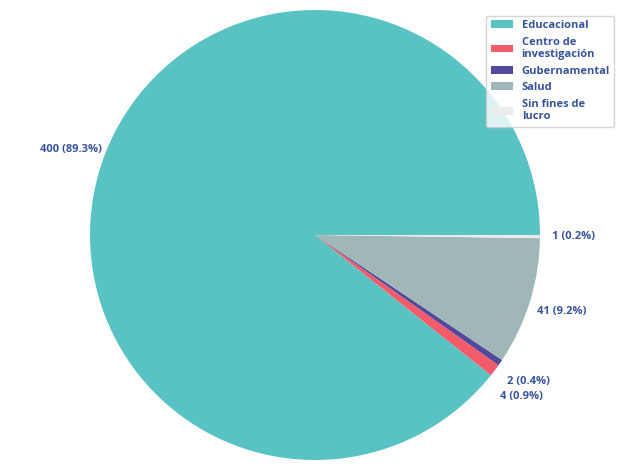

In [ ]:
df_institutions_lastyear = df_institutions[df_institutions['year']==2023]

def label_function(val):
    if val == 0:
      return ''
    if np.round(val / 100 * len(df_institutions_lastyear)) == 4:
      return f'\n{val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
ax = df_institutions_lastyear.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.15)#, labeldistance=1.4)
ax.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participaron en\nartículos relacionados al tema \"{}\"\ndurante año 2023'.format(name))
plt.tight_layout()
ax.axis('equal')
ax.margins(0,0)
plt.savefig(base_dir+'/{}_institut_2023.png'.format(name))
plt.savefig(base_dir+'/{}_institut_2023.svg'.format(name))
plt.show()

In [ ]:
df_institutions_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for inst_type in df_institutions['type'].unique():
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_type = df_institutions[df_institutions['type']==inst_type]
  for _, row in df_type.iterrows():
    if row['year'] != 2024:
      counting[map[row['year']]] += 1
  df_institutions_years[inst_type] = counting


df_institutions_years

,Educacional,Salud,Sin fines de\nlucro,Centro de\ninvestigación,Gubernamental,Otro,Compañia
2013,210,75,3,0,2,0,0
2014,282,32,5,6,2,1,0
2015,495,108,5,14,1,0,0
2016,327,59,1,20,2,1,0
2017,346,70,4,7,2,0,0
2018,412,56,8,22,3,0,3
2019,390,71,7,23,5,0,0
2020,484,72,6,30,3,1,0
2021,428,64,4,25,4,4,0
2022,388,101,2,14,11,1,0


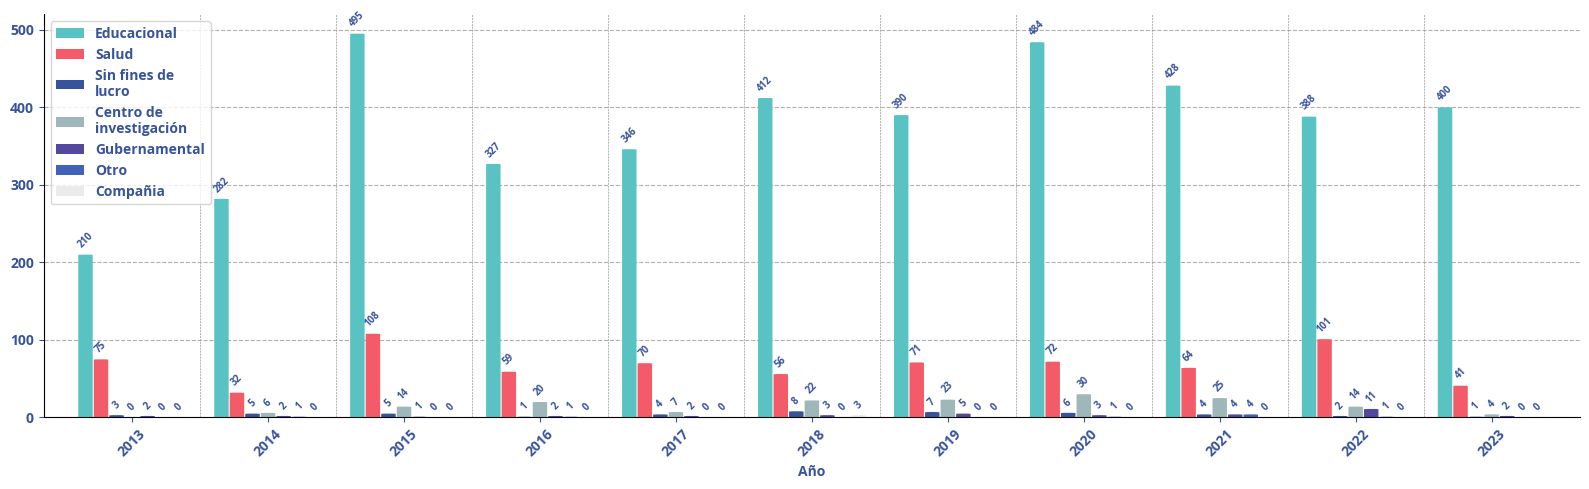

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 7

df_institutions_years.plot.bar(rot=45, ax=ax, width=0.8, color= [COLOR_PALETTE[1], COLOR_PALETTE[2],
                                                                 COLOR_PALETTE[0], COLOR_PALETTE[4],
                                                                 COLOR_PALETTE[3], COLOR_PALETTE[6],
                                                                 COLOR_PALETTE[5]])#,
                               #color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=10)
ax.set_xlabel('Año')#, fontsize=8)
ax.bar_label(ax.containers[0], rotation=45, fontsize=7, padding=3)#, labels=df_['2018'], fontsize=6, rotation=90, padding=2)
ax.bar_label(ax.containers[1], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[2], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[3], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[4], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[5], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[6], rotation=45, fontsize=7, padding=3)
ax.tick_params(axis='both', labelsize=10)
#ax.set_title('Evolución en 10 años de los tipos de instituciones chilenas que participan\nen artículos relacionados al tema \"{}\"'.format(name))
ax.grid(False, axis='x')
for i in range(11-1):
  ax.axvline(0.5 +i, markersize=0.0001, linewidth=0.4, color='gray', linestyle='--')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/{}_instit_evol.png'.format(name))
plt.savefig(base_dir+'/{}_instit_evol.svg'.format(name))
plt.show()

## CARDIOVASCULAR DISEASE

In [ ]:
### OPENALEX DATA EXTRACTION

# PARAMETERS
name='enfermedades cardiovasculares'

concept_wikidata = 'https://www.wikidata.org/wiki/Q389735|https://www.wikidata.org/wiki/Q12152|https://www.wikidata.org/wiki/Q12202|https://www.wikidata.org/wiki/Q180762|https://www.wikidata.org/wiki/Q41861|https://www.wikidata.org/wiki/Q1079120|https://www.wikidata.org/wiki/Q266018|https://www.wikidata.org/wiki/Q844935'
  # CARDIOVASCULAR DISEASE|myocardial infarction|stroke|angina pectoris|arterial hypertension|hyperlipidemia|acute coronary syndrome|
  # coronary artery (or heart)disease

#https://api.openalex.org/works?filter=concepts.wikidata:https://www.wikidata.org/wiki/Q389735|https://www.wikidata.org/wiki/Q12152|https://www.wikidata.org/wiki/Q12202|https://www.wikidata.org/wiki/Q180762|https://www.wikidata.org/wiki/Q41861|https://www.wikidata.org/wiki/Q1079120|https://www.wikidata.org/wiki/Q266018|https://www.wikidata.org/wiki/Q844935,institutions.country_code:cl,from_publication_date:2013-01-01,type:article
entity = 'works'
country = 'cl'
date = '2013-01-01'
type_to_search = 'article'

texts_checkpoint = ''
load_texts_checkpoint = True
##############

### API_URL COMPLETO PARA VOSVIEWER
api_url = 'https://api.openalex.org/{}?filter=concepts.wikidata:{},institutions.country_code:{},from_publication_date:{},type:{}&page={}'

page = 1
has_more_pages = True
fewer_than_10k_results = True

w_count=0
titles_list=[]
keywords_list=[]
keyword_years=[]
public_year=[]
chilean_institutions = []
year_institutions = []
gob_names = []
fac_names = []
fac_years = []
# loop through pages
while has_more_pages and fewer_than_10k_results:

    # set page value and request page from OpenAlex
    url = api_url.format(entity, concept_wikidata, country, date, type_to_search, page)
    #print('\n' + url)
    page_with_results = requests.get(url).json()
    #print(page_with_results)

    # loop through partial list of results
    results = page_with_results['results']

    ### TO PRINT ###
    kws_sublist = []
    kws_year_sublist = []
    for i, work in enumerate(results):
      titles_list.append(work['display_name'])
      public_year.append(work['publication_year'])
      #print(work['display_name'])
      #print(work['keywords'])
      for kw in work['keywords']:
        kws_sublist.append(kw['keyword'])
        kws_year_sublist.append(work['publication_year'])
        #print(kw['keyword'], end='\t' if (i+1)%5!=0 else '\n')
      for author in work['authorships']:
        for institution in author['institutions']:
          if institution['country_code'] == 'CL':
            chilean_institutions.append(institution['type'])
            year_institutions.append(work['publication_year'])
            if institution['type'] == 'government' and work['publication_year']==2023:
              gob_names.append(institution['display_name'])
            if institution['type'] == 'facility':
              fac_names.append(institution['display_name'])
              fac_years.append(work['publication_year'])
            if institution['display_name'] == 'Millennium Nucleus of Ion Channel Associated Diseases':
              print(work['title'])
              for c2 in work['concepts']:
                print(c2['display_name'])

      w_count += 1
    ################
    keywords_list = keywords_list + kws_sublist
    keyword_years = keyword_years + kws_year_sublist

    # next page
    page += 1

    # end loop when either there are no more results on the requested page
    # or the next request would exceed 10,000 results
    per_page = page_with_results['meta']['per_page']
    has_more_pages = len(results) == per_page
    fewer_than_10k_results = per_page * page <= 10000
    if not fewer_than_10k_results:
      print('More than 10k results. Does not show all results')

print('\n\nTotal {} {}s.'.format(w_count, type_to_search))

Ursodeoxycholic acid induces sarcopenia associated with decreased protein synthesis and autophagic flux
Sarcopenia
Myogenesis
Skeletal muscle
Internal medicine
Endocrinology
Myosin
Protein degradation
Ursodeoxycholic acid
Myocyte
C2C12
Myofibril
Chemistry
Autophagy
Troponin
Medicine
Biochemistry
Apoptosis
Myocardial infarction
Nanoengineered Sprayable Therapy for Treating Myocardial Infarction
Contractility
Ventricle
Medicine
Myocardial infarction
In vivo
Cardiology
Cardiac muscle
Cardiac function curve
Internal medicine
Biomedical engineering
Infarction
Biology
Heart failure
Biotechnology
Sonotrombolisis en el ataque cerebrovascular isquémico: once años de experiencia en Clínica Alemana de Santiago
Medicine
Thrombolysis
Transcranial Doppler
Middle cerebral artery
Stroke (engine)
Asymptomatic
Modified Rankin Scale
Occlusion
Internal medicine
Cardiology
Ischemic stroke
Myocardial infarction
Ischemia
Mechanical engineering
Engineering


Total 768 articles.


In [ ]:
df_facilities = pd.DataFrame({'nombre': fac_names, 'año': fac_years})
for y in range(2013, 2024):
  print('Año {}:'.format(y))
  for center in df_facilities[df_facilities['año']==y]['nombre'].unique():
    print('{} = {} artículos.'.format(center, len(df_facilities[(df_facilities['año']==y)&(df_facilities['nombre']==center)])))
  print()

Año 2013:

Año 2014:
Millennium Nucleus of Ion Channel Associated Diseases = 1 artículos.

Año 2015:
Advanced Center for Chronic Diseases = 12 artículos.
European Southern Observatory = 11 artículos.

Año 2016:
Advanced Center for Chronic Diseases = 7 artículos.

Año 2017:
Advanced Center for Chronic Diseases = 9 artículos.

Año 2018:
Advanced Center for Chronic Diseases = 16 artículos.

Año 2019:
Advanced Center for Chronic Diseases = 2 artículos.
Instituto de Investigaciones Agropecuarias = 1 artículos.

Año 2020:
Millennium Institute on Immunology and Immunotherapy = 3 artículos.
Advanced Center for Chronic Diseases = 9 artículos.
Instituto de Neurociencia Biomédica = 16 artículos.
Dirección de Investigación y Desarrollo = 2 artículos.

Año 2021:
Advanced Center for Chronic Diseases = 24 artículos.
Dirección de Investigación y Desarrollo = 1 artículos.

Año 2022:
Advanced Center for Chronic Diseases = 4 artículos.
Millennium Nucleus of Ion Channel Associated Diseases = 1 artículos.


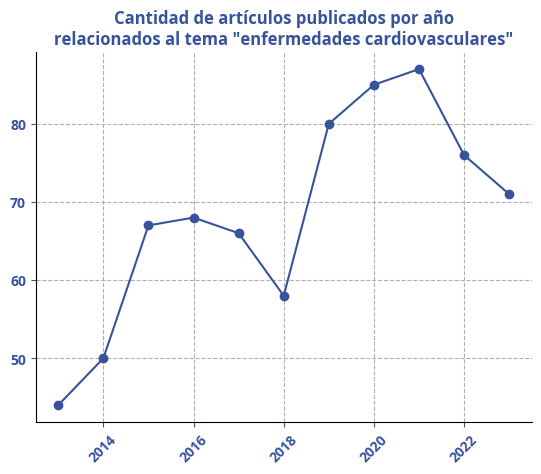

In [ ]:
df_years = pd.DataFrame({'Publication years': public_year, 'Titles': titles_list})
df_years = df_years.drop(df_years[df_years['Publication years'] == 2024].index)
df_years = df_years.sort_values('Publication years')
df_years['Publication years'].value_counts(sort=False).plot(kind='line', rot=45)
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
plt.title('Cantidad de artículos publicados por año\nrelacionados al tema \"{}\"'.format(name))
plt.show()

In [ ]:
cardiov_total = df_years['Publication years'].value_counts(sort=False)

### Keywords

In [ ]:
counts = Counter(keywords_list)
print('Most common keywords (2013-2024, Chile):\n')
common_kws = counts.most_common(13)
for i, kw_i in enumerate(common_kws):
  if kw_i[0] == name or kw_i[0] == 'chile':
    common_kws.remove(common_kws[i])
common_kws

Most common keywords (2013-2024, Chile):



[('myocardial infarction', 47),
 ('ischemic stroke', 30),
 ('stroke', 26),
 ('acute ischemic stroke', 23),
 ('coronary artery disease', 21),
 ('acute myocardial infarction', 19),
 ('cardiovascular disease', 15),
 ('meta-analysis', 15),
 ('latin america', 13),
 ('percutaneous coronary intervention', 12),
 ('acute coronary syndrome', 12),
 ('long-term', 12)]

In [ ]:
common_kws.remove(('meta-analysis', 15))
common_kws.remove(('cardiovascular disease', 15))
common_kws

[('myocardial infarction', 47),
 ('ischemic stroke', 30),
 ('stroke', 26),
 ('acute ischemic stroke', 23),
 ('coronary artery disease', 21),
 ('acute myocardial infarction', 19),
 ('latin america', 13),
 ('percutaneous coronary intervention', 12),
 ('acute coronary syndrome', 12),
 ('long-term', 12)]

In [ ]:
df_keywords = pd.DataFrame({'keyword': keywords_list, 'keyword year': keyword_years})
df_keywords

,keyword,keyword year
0,grip strength,2015
1,prospective urban rural epidemiology,2015
2,prognostic value,2015
3,acute intracerebral hemorrhage,2013
4,blood-pressure blood-pressure,2013
...,...,...
2176,para el diagnóstico precoz,2021
2177,oculto,2021
2178,el diagnóstico,2021
2179,posterior,2021


In [ ]:
df_keyword_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for common_kw in common_kws:
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_common_kw = df_keywords[df_keywords['keyword'] == common_kw[0]]
  for _, row in df_common_kw.iterrows():
    if row['keyword year'] != 2024:
      counting[map[row['keyword year']]] += 1
  df_keyword_years[common_kw[0]] = counting

df_keyword_years

,myocardial infarction,ischemic stroke,stroke,acute ischemic stroke,coronary artery disease,acute myocardial infarction,latin america,percutaneous coronary intervention,acute coronary syndrome,long-term
2013,6,2,1,3,0,5,1,0,0,0
2014,2,1,1,0,3,2,1,0,0,0
2015,5,4,6,4,1,1,0,0,1,4
2016,7,1,0,2,1,3,1,2,1,2
2017,4,8,2,5,2,3,0,1,2,2
2018,6,1,1,0,3,1,1,0,1,0
2019,3,2,4,3,0,0,1,1,1,1
2020,1,4,3,1,1,0,4,3,2,1
2021,6,2,4,1,2,1,2,1,2,1
2022,3,3,1,3,5,1,2,2,1,1


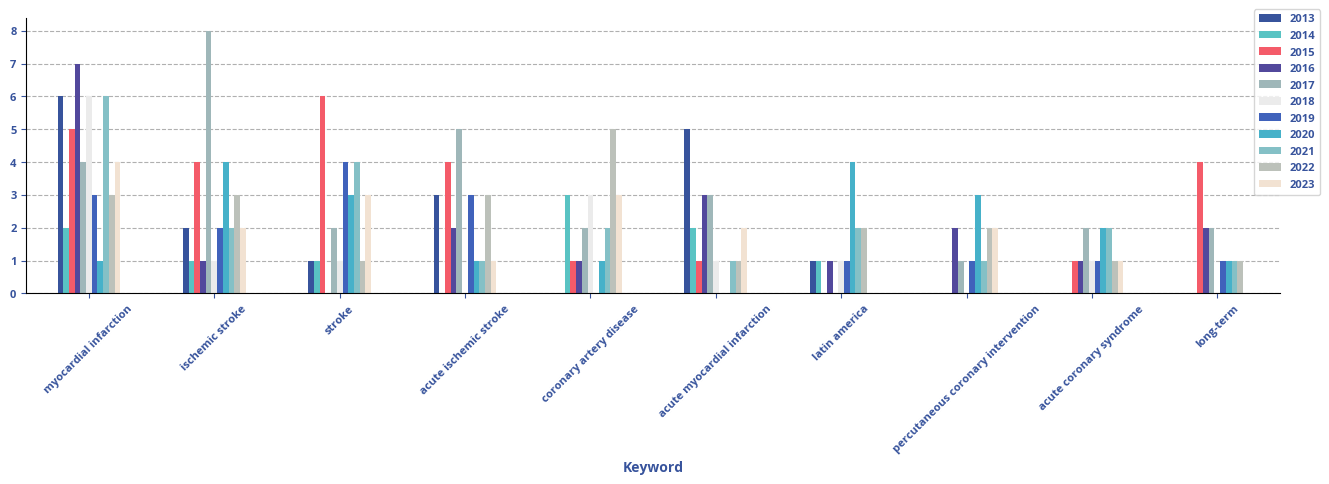

In [ ]:
from colour import Color
fig, ax = plt.subplots(figsize=(13,5))

df_keyword_years.T.plot.bar(rot=45, ax=ax)#, color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=8, bbox_to_anchor=(0.975, 1.05))
ax.set_xlabel('Keyword')#, fontsize=8)
ax.tick_params(axis='both', labelsize=8)
#ax.set_title('Cantidad de artículos por año asignados con las 10 keywords\nmás comunes relacionadas al tema \"{}\"'.format(name))
#round_corners(ax)
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir+'/{}_keywords.png'.format(name))
plt.savefig(base_dir+'/{}_keywords.svg'.format(name))
plt.show()

### Institutions analysis

In [ ]:
instituciones_chilenas = []
for i in chilean_institutions:
  if i == 'education':
    instituciones_chilenas.append('Educacional')
  if i == 'healthcare':
    instituciones_chilenas.append('Salud')
  if i == 'facility':
    instituciones_chilenas.append('Centro de\ninvestigación')
  if i == 'company':
    instituciones_chilenas.append('Compañia')
  if i == 'government':
    instituciones_chilenas.append('Gubernamental')
  if i == 'nonprofit':
    instituciones_chilenas.append('Sin fines de\nlucro')
  if i == 'other':
    instituciones_chilenas.append('Otro')

In [ ]:
df_institutions = pd.DataFrame({'type': instituciones_chilenas, 'year': year_institutions})

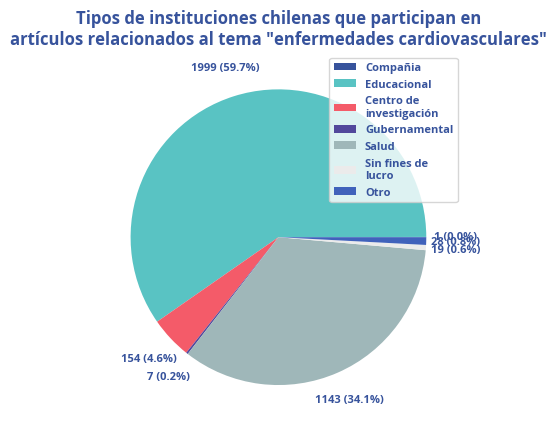

In [ ]:
def label_function(val):
    if int(val / 100 * len(df_institutions)) == 80:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions)) == 369:
      return f'\n  {val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    if int(val / 100 * len(df_institutions))+1 == 162:
      return f'\n{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)

df_institutions['type'] = pd.Categorical(df_institutions['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
df_institutions.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
plt.legend(loc='upper right', fontsize=8)
plt.title('Tipos de instituciones chilenas que participan en\nartículos relacionados al tema \"{}\"'.format(name))
plt.show()

<ipython-input-73-8e8ac85e6c53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',


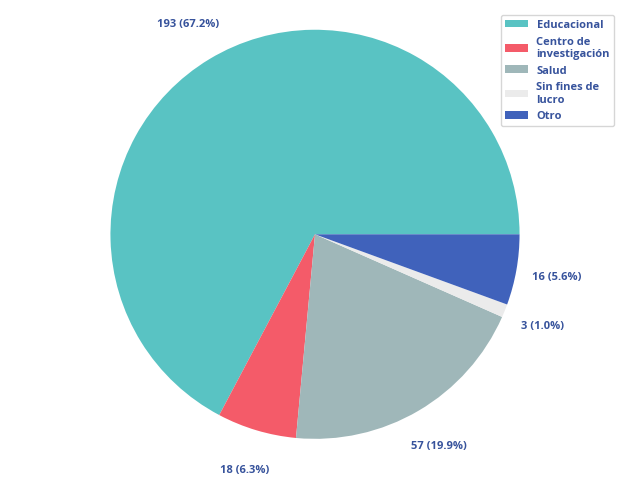

In [ ]:
df_institutions_lastyear = df_institutions[df_institutions['year']==2023]

def label_function(val):
    if val == 0:
      return ''
    if np.round(val / 100 * len(df_institutions_lastyear)) == 19:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 37:
      return f'\n  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 13:
      return f'  {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    if np.round(val / 100 * len(df_institutions_lastyear)) == 26:
      return f'               {val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    else:
      return f'{val / 100 * len(df_institutions_lastyear):.0f} ({val:.1f}%)'
    #return f'{val:.0f}%'
distance = 0.03
separate = (0.1, 0.1, distance, distance, distance, distance, 0.1)
df_institutions_lastyear['type'] = pd.Categorical(df_institutions_lastyear['type'], ['Compañia', 'Educacional', 'Centro de\ninvestigación',
                                                                   'Gubernamental', 'Salud', 'Sin fines de\nlucro', 'Otro'])
ax= df_institutions_lastyear.groupby('type').size().plot(kind='pie', autopct=label_function, #explode=separate,
                                            textprops={'fontsize': 8}, legend=True,
                                            labeldistance=None, pctdistance=1.2)#, labeldistance=1.4)
ax.legend(loc='upper right', fontsize=8)
#plt.title('Tipos de instituciones chilenas que participaron en\nartículos relacionados al tema \"{}\"\ndurante año 2023'.format(name))
plt.tight_layout()
ax.axis('equal')
ax.margins(0,0.05)
plt.savefig(base_dir+'/{}_instit_2023.png'.format(name))
plt.savefig(base_dir+'/{}_instit_2023.svg'.format(name))
plt.show()

In [ ]:
df_institutions_years = pd.DataFrame([], index=list(range(2013,2024)))
map = {2013: 0, 2014: 1, 2015: 2, 2016: 3, 2017: 4, 2018: 5, 2019: 6, 2020: 7,
       2021: 8, 2022: 9, 2023: 10}

for inst_type in df_institutions['type'].unique():
  counting=np.zeros(len(list(range(2013,2024))), dtype=int)
  df_type = df_institutions[df_institutions['type']==inst_type]
  for _, row in df_type.iterrows():
    if row['year'] != 2024:
      counting[map[row['year']]] += 1
  df_institutions_years[inst_type] = counting


df_institutions_years

,Educacional,Salud,Otro,Centro de\ninvestigación,Sin fines de\nlucro,Gubernamental,Compañia
2013,130,67,4,0,0,0,0
2014,133,75,0,1,1,1,0
2015,254,146,4,23,1,1,0
2016,172,90,2,7,1,0,0
2017,264,158,0,9,0,0,0
2018,130,53,0,16,0,1,0
2019,145,97,2,3,1,0,1
2020,170,92,0,30,2,1,0
2021,182,167,0,25,8,3,0
2022,197,119,0,14,2,0,0


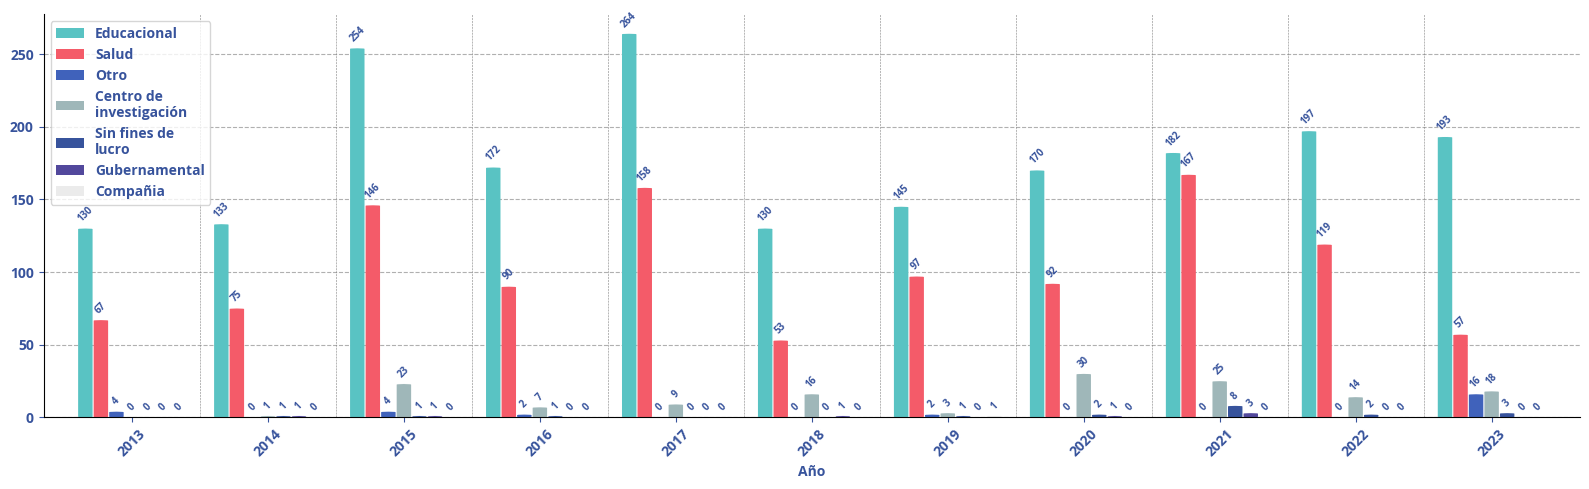

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

cm = plt.get_cmap('tab20')
NUM_COLORS = 7

df_institutions_years.plot.bar(rot=45, ax=ax, width=0.8, color=[COLOR_PALETTE[1],COLOR_PALETTE[2],
                                                                COLOR_PALETTE[6],COLOR_PALETTE[4],
                                                                COLOR_PALETTE[0],COLOR_PALETTE[3],
                                                                COLOR_PALETTE[5]])#,
                               #color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.grid(axis='y', linestyle='--')
plt.rc('axes', axisbelow=True)
ax.legend(fontsize=10)
ax.set_xlabel('Año')#, fontsize=8)
ax.bar_label(ax.containers[0], rotation=45, fontsize=7, padding=3)#, labels=df_['2018'], fontsize=6, rotation=90, padding=2)
ax.bar_label(ax.containers[1], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[2], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[3], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[4], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[5], rotation=45, fontsize=7, padding=3)
ax.bar_label(ax.containers[6], rotation=45, fontsize=7, padding=3)
ax.tick_params(axis='both', labelsize=10)
#ax.set_title('Evolución en 10 años de los tipos de instituciones chilenas que participan\nen artículos relacionados al tema \"{}\"'.format(name))
ax.grid(False, axis='x')
round_corners(ax)
for i in range(11-1):
  ax.axvline(0.5 +i, markersize=0.0001, linewidth=0.4, color='gray', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+'/{}_instit_evol.png'.format(name))
plt.savefig(base_dir+'/{}_instit_evol.svg'.format(name))
plt.show()

## GENERAL

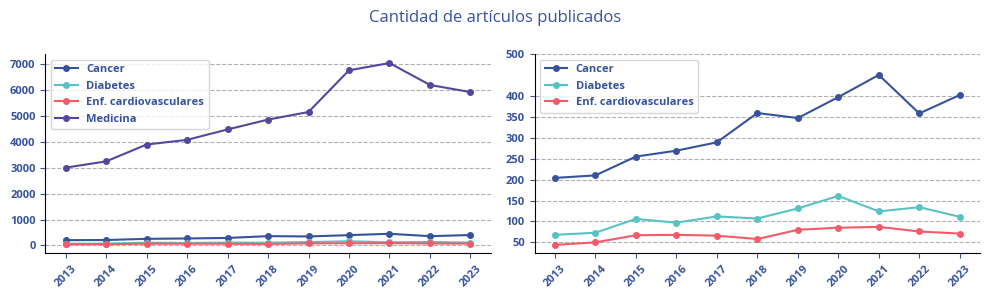

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(cancer_total, label='Cancer', markersize=4)
axs[0].plot(diabetes_total, label='Diabetes', markersize=4)
axs[0].plot(cardiov_total, label='Enf. cardiovasculares', markersize=4)
axs[0].plot(medicine_total, label='Medicina', markersize=4)
axs[0].legend(fontsize=8)
axs[0].grid(axis='y', linestyle='--')
axs[0].set_xticks(list(range(2013,2024)))#
axs[0].tick_params(axis='x', labelsize=8, rotation=45)
axs[0].tick_params(axis='y', labelsize=8)
#plt.yticks([50, 100, 150, 200, 250, 300, 350, 400, 500], fontsize=8)
#plt.ylim((0,550))
fig.suptitle('Cantidad de artículos publicados')
axs[1].plot(cancer_total, label='Cancer', markersize=4)
axs[1].plot(diabetes_total, label='Diabetes', markersize=4)
axs[1].plot(cardiov_total, label='Enf. cardiovasculares', markersize=4)
#axs[0].plot(medicine_total, label='General medicine')
axs[1].legend(fontsize=8)
axs[1].grid(axis='y', linestyle='--')
axs[1].set_xticks(list(range(2013,2024)))#
axs[1].tick_params(axis='x', labelsize=8, rotation=45)
axs[1].tick_params(axis='y', labelsize=8)
plt.yticks([50, 100, 150, 200, 250, 300, 350, 400, 500], fontsize=8)
#plt.ylim((0,550))

plt.tight_layout()
plt.savefig(base_dir+'/total_papers.png')
plt.savefig(base_dir+'/total_papers.svg')
plt.show()

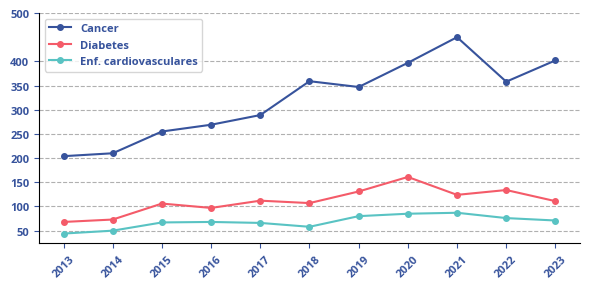

In [ ]:
fig, axs = plt.subplots(figsize=(6,3))
axs.plot(cancer_total, label='Cancer', markersize=4, color=COLOR_PALETTE[0])
axs.plot(diabetes_total, label='Diabetes', markersize=4, color=COLOR_PALETTE[2])
axs.plot(cardiov_total, label='Enf. cardiovasculares', markersize=4, color=COLOR_PALETTE[1])
#axs[0].plot(medicine_total, label='General medicine')
axs.legend(fontsize=8)
axs.grid(axis='y', linestyle='--')
axs.set_xticks(list(range(2013,2024)))#
axs.tick_params(axis='x', labelsize=8, rotation=45)
axs.tick_params(axis='y', labelsize=8)
plt.yticks([50, 100, 150, 200, 250, 300, 350, 400, 500], fontsize=8)
#plt.ylim((0,550))

plt.tight_layout()
plt.savefig(base_dir+'/total_only3_papers.png')
plt.savefig(base_dir+'/total_only3_papers.svg')
plt.show()

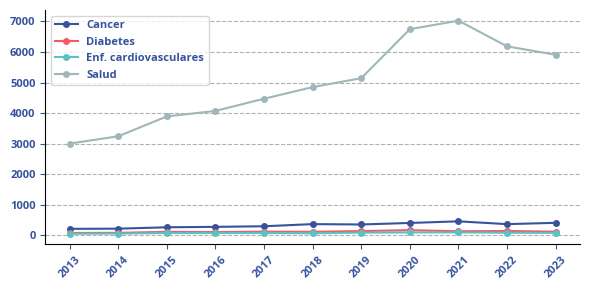

In [ ]:
fig, axs = plt.subplots(figsize=(6,3))
axs.plot(cancer_total, label='Cancer', markersize=4, color=COLOR_PALETTE[0])
axs.plot(diabetes_total, label='Diabetes', markersize=4, color=COLOR_PALETTE[2])
axs.plot(cardiov_total, label='Enf. cardiovasculares', markersize=4, color=COLOR_PALETTE[1])
axs.plot(medicine_total, label='Salud', markersize=4, color=COLOR_PALETTE[4])
axs.legend(fontsize=8)
axs.grid(axis='y', linestyle='--')
axs.set_xticks(list(range(2013,2024)))#
axs.tick_params(axis='x', labelsize=8, rotation=45)
axs.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig(base_dir+'/total_papers_salud.png')
plt.savefig(base_dir+'/total_papers_salud.svg')